# Paquetes

In [70]:
import random as rd
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Experimentos 

In [71]:
%reload_ext autoreload
%autoreload 2
import opdproblem as opd

In [84]:
n_clique = 20

In [91]:
n_clique = 20 + 1 
opd.seed(42)
both = []
inf = []
random = []
clique = []
graph = []

for n in range(4, n_clique):

#    print(f'es el grafo  k{n}')
#     print('+' * 10)
    for i in range(30):
        #print('es la instancia: ', i)
        #print('-' * 10)

        # se inicializa el grafo y el algoritmo
        G = opd.OPDGraph(n=n, area_type='bounded_homogeneous')
        search = opd.Alg(G)

        # Se busca el alpha-certificado
        search_inf = search.search_app(method='inf')
        search_random = search.search_app(method='random1')
        search_both = search.both_alg()
        

        both.append(search_both)
        inf.append(search_inf)
        random.append(search_random)
        graph.append(G)
    l_aux = [f'k{n}'] * 30
    clique.extend(l_aux)
cert_dict = {'clique': clique, 'inf': inf, 'random': random,'both' : both, 'graph': graph}

        #cert_dic[(f'k{n}', 'graph', f'inst{i}')] = G.graph

        


In [92]:
df = pd.DataFrame(cert_dict)
df[df['clique']=='k6'].head(30)

,clique,inf,random,both,graph
60,k6,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (1, 2), (0, 4), (3, 4), (1, 5), (0, 3...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2...",<opdproblem.OPDproblem.OPDGraph object at 0x79...
61,k6,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (2, 4), (0, 4), (3, 4), (1, 5), (0, 3...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2...",<opdproblem.OPDproblem.OPDGraph object at 0x79...
62,k6,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (2, 4), (1, 2), (0, 4), (1, 5), (0, 3...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2...",<opdproblem.OPDproblem.OPDGraph object at 0x79...
63,k6,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2...",<opdproblem.OPDproblem.OPDGraph object at 0x79...
64,k6,"[(0, 1), (2, 4), (1, 2), (0, 4), (3, 4), (1, 5...","[(0, 1), (2, 4), (1, 2), (0, 4), (3, 4), (1, 5...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2...",<opdproblem.OPDproblem.OPDGraph object at 0x79...
65,k6,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (2, 4), (1, 2), (0, 4), (3, 4), (1, 5...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2...",<opdproblem.OPDproblem.OPDGraph object at 0x79...
66,k6,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2...",<opdproblem.OPDproblem.OPDGraph object at 0x79...
67,k6,"[(0, 1), (1, 2), (0, 4), (3, 4), (1, 5), (0, 3...","[(0, 1), (1, 2), (0, 4), (3, 4), (1, 5), (0, 3...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2...",<opdproblem.OPDproblem.OPDGraph object at 0x79...
68,k6,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (1, 2), (0, 4), (0, 3), (1, 4), (0, 2...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2...",<opdproblem.OPDproblem.OPDGraph object at 0x79...
69,k6,"[(0, 1), (1, 2), (0, 4), (1, 5), (0, 3), (1, 4...","[(0, 1), (2, 4), (1, 2), (0, 4), (1, 5), (0, 3...","[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 2...",<opdproblem.OPDproblem.OPDGraph object at 0x79...


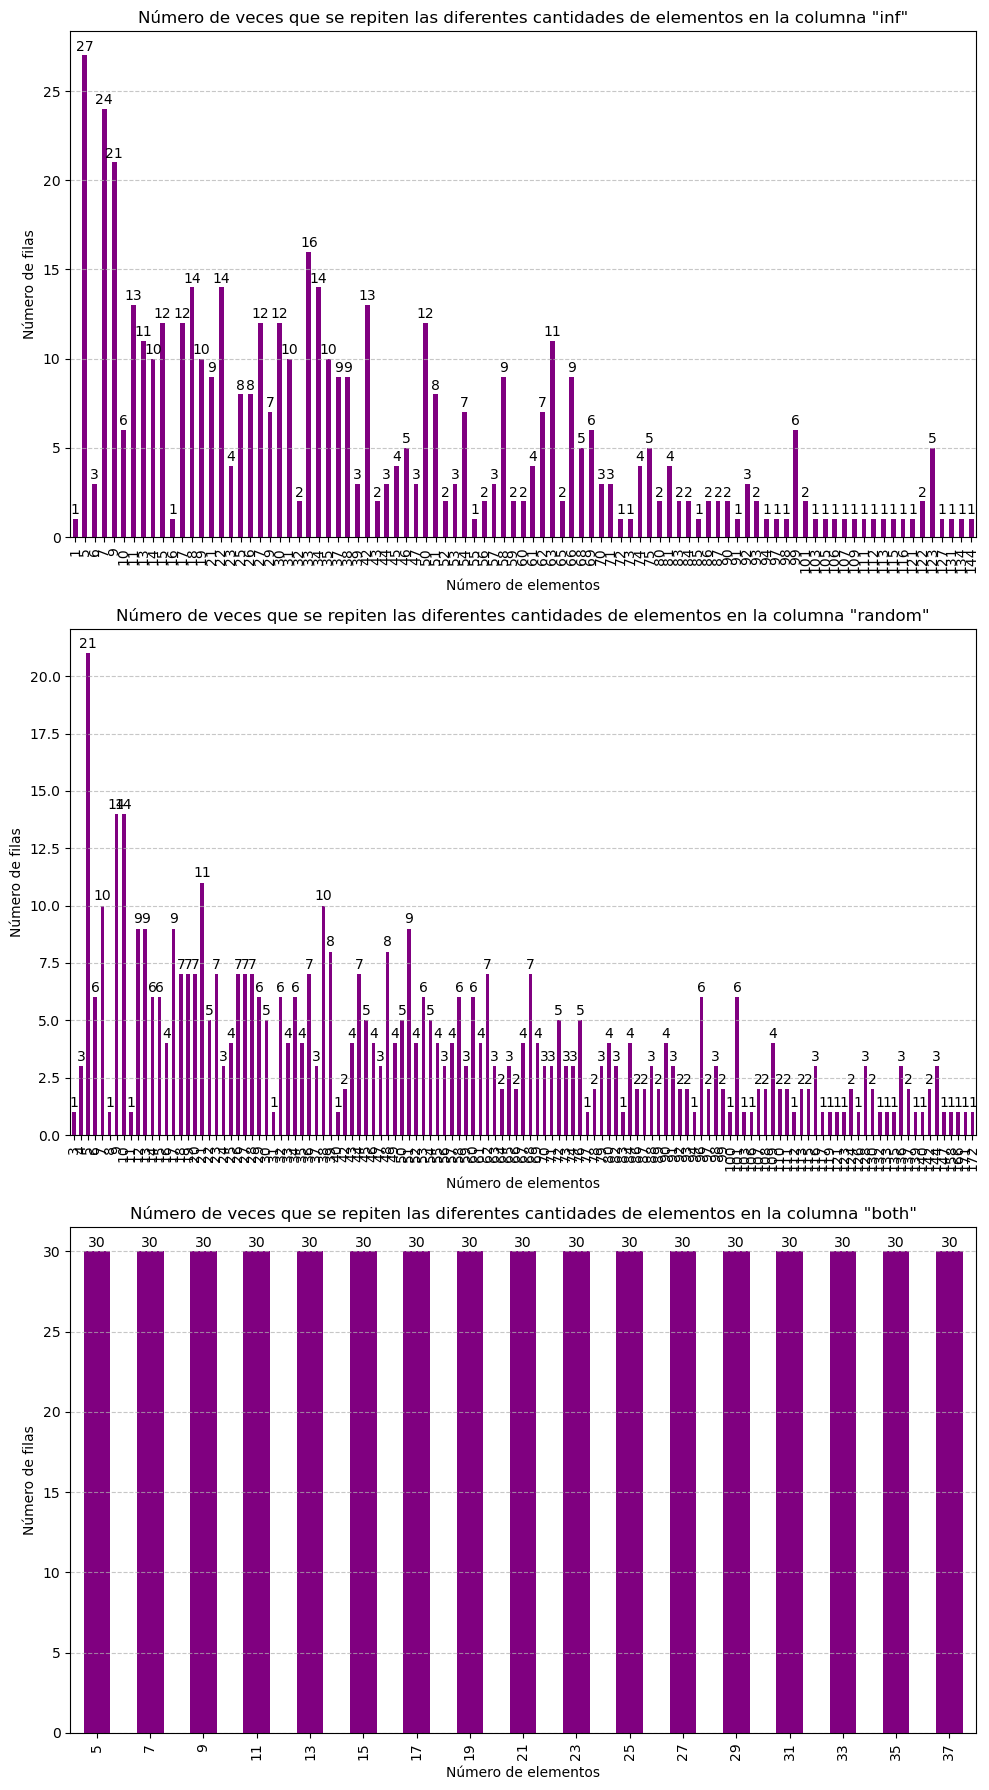

In [95]:
# Inicializar el plot con subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Iterar sobre cada columna y generar un gráfico de barras para cada una
for i, column in enumerate(['inf', 'random', 'both']):
    # Contar el número de elementos en la columna para cada fila
    counts = df[column].apply(len)
    # Contar el número de veces que se repite cada cantidad de elementos
    counts = counts.value_counts().sort_index()
    # Crear el gráfico de barras
    counts.plot(kind='bar', color='purple', ax=axes[i])
    axes[i].set_title('Número de veces que se repiten las diferentes cantidades de elementos en la columna "{}"'.format(column))
    axes[i].set_xlabel('Número de elementos')
    axes[i].set_ylabel('Número de filas')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

    # Agregar el valor numérico a cada barra
    for index, value in enumerate(counts):
        axes[i].text(index, value + 0.1, str(value), ha='center', va='bottom')


plt.tight_layout()
plt.show()

In [ ]:
%%timeit

# Extraccion de la Data

## Metodo inf

# Graficos 

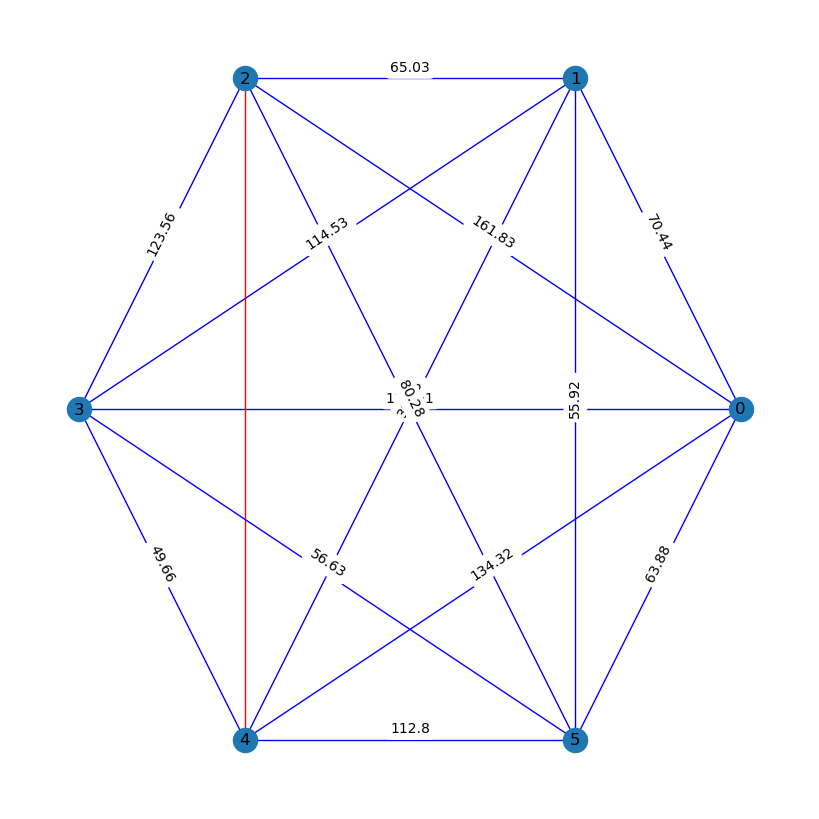

In [94]:
# Graficar el grafo
G = grafo_none
for u, v in G.edges():
    G[u][v]['weight'] = round(G[u][v]['weight'], 2)

# Redondear las áreas a dos decimales
for u, v in G.edges():
    area_start, area_end = G[u][v]['area']
    G[u][v]['area'] = (round(area_start, 2), round(area_end, 2))
# Lista de aristas que solo mostrarán su peso
edge_list_weight = [(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (2, 1),
 (2, 3),
 (2, 5),
 (3, 1),
 (3, 4),
 (3, 5),
 (4, 1),
 (4, 3),
 (5, 1),
 (5, 4)]
# Convertir las aristas a una forma canónica
canonical_edge_list_weight = [(min(u, v), max(u, v)) for u, v in edge_list_weight]

# Obtener los atributos de peso para las aristas en edge_list_weight
edge_weights = {(u, v): d['weight'] for u, v, d in G.edges(data=True) if (min(u, v), max(u, v)) in canonical_edge_list_weight}

# Graficar el grafo con los pesos y colores
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G)  # Posiciones de los nodos

# Obtener colores para las aristas con weight
edge_colors_weight = ['blue' if (min(u, v), max(u, v)) in canonical_edge_list_weight else 'red' for u, v, d in G.edges(data=True)]

# Dibujar el grafo con colores de arista según el atributo
nx.draw(G, pos, with_labels=True, edge_color=edge_colors_weight)

# Definir desplazamiento para evitar superposiciones
pos_labels = nx.spring_layout(G, pos=pos, fixed=G.nodes())
pos_labels = {key: (x, y + 0.03) for key, (x, y) in pos_labels.items()}

# Mostrar pesos para las aristas en edge_list_weight
nx.draw_networkx_edge_labels(G, pos_labels, edge_labels=edge_weights)

plt.show()

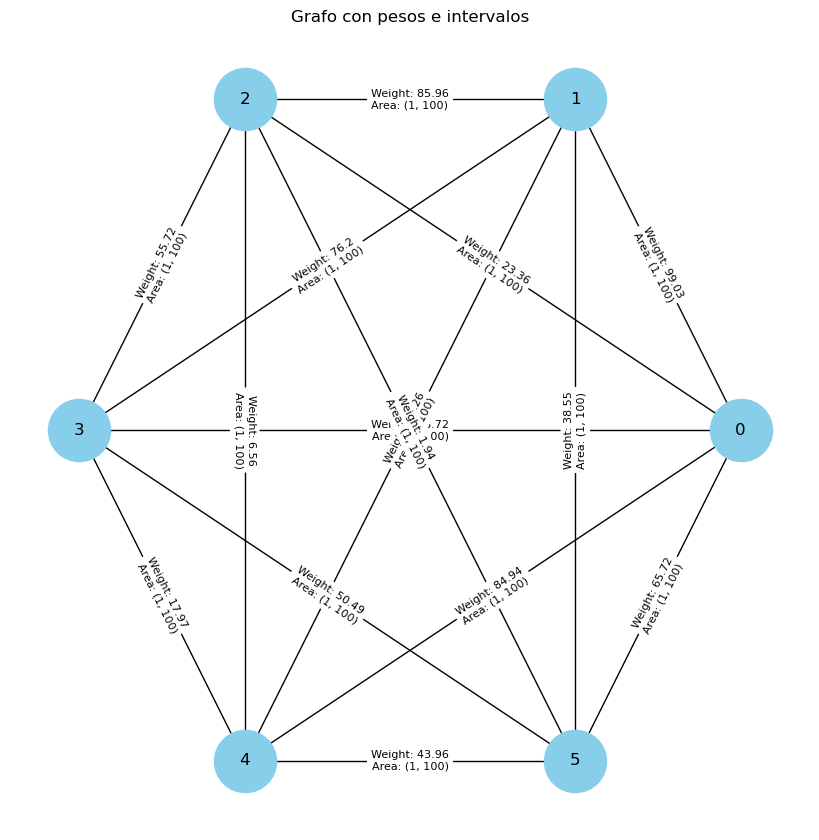

In [35]:
# Redondear los pesos a dos decimales
G = grafo_none
for u, v in G.edges():
    G[u][v]['weight'] = round(G[u][v]['weight'], 2)

# Redondear las áreas a dos decimales
for u, v in G.edges():
    area_start, area_end = G[u][v]['area']
    G[u][v]['area'] = (round(area_start, 2), round(area_end, 2))

# Obtener los pesos y áreas de las aristas
weights = [G[u][v]['weight'] for u, v in G.edges()]
areas = [G[u][v]['area'] for u, v in G.edges()]

# Dibujar el grafo con más espacio entre nodos
plt.figure(figsize=(8, 8))
pos = nx.circular_layout(G)  # Posiciones de los nodos
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000)

# Ajustar las etiquetas de peso para que no se superpongan
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): f"Weight: {G[u][v]['weight']}\nArea: {G[u][v]['area']}" for u, v in G.edges()}, label_pos=0.5, font_size=8)

# Mostrar la gráfica
plt.title('Grafo con pesos e intervalos')
plt.show()

## metodo both